<a href="https://colab.research.google.com/github/Tushar-2935/Financial-Data-Analysis-/blob/main/Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
ticker=input("Enter ticker:")
stock_data=yf.download(ticker,start='2020-01-01',end='2023-01-01')

Enter ticker:AAPL


[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd
#Calculate moving averages
stock_data['MA50']=stock_data['Close'].rolling(window=50).mean()
stock_data['MA200']=stock_data['Close'].rolling(window=200).mean()
#Calculate Daily returns
stock_data['Daily_Returns']=stock_data['Close'].pct_change()
#Drop missing values
stock_data.dropna(inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

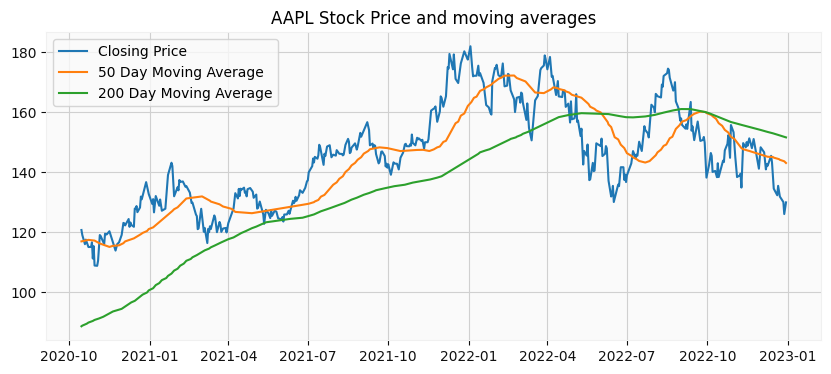

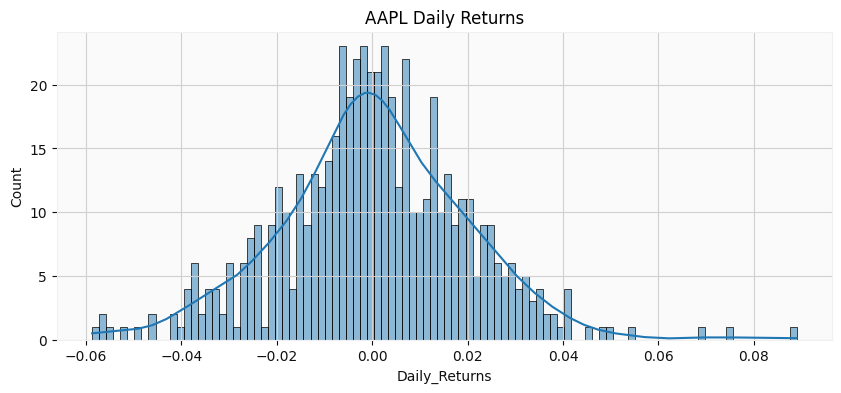

In [ ]:
#Plot closing price and moving averages
plt.figure(figsize=(10,4))
plt.plot(stock_data['Close'],label='Closing Price')
plt.plot(stock_data['MA50'],label='50 Day Moving Average')
plt.plot(stock_data['MA200'],label='200 Day Moving Average')
plt.title(f"{ticker} Stock Price and moving averages")
plt.legend()
plt.show()

#Plot daily returns
plt.figure(figsize=(10,4))
sns.histplot(stock_data['Daily_Returns'],bins=100,kde=True)
plt.title(f"{ticker} Daily Returns")
plt.show()

In [ ]:
mean_return=stock_data['Daily_Returns'].mean()
std_return=stock_data['Daily_Returns'].std()
print(f"Mean Daily Return: {mean_return}")
print(f"Standard Deviation of Daily Return: {std_return}")

Mean Daily Return: 0.0006417692925305891
Standard Deviation of Daily Return: 0.027089938208687204


In [ ]:
confidence_level=0.05
VaR=stock_data['Daily_Returns'].quantile(confidence_level)
print(f"Value at risk {VaR} at {confidence_level*100}%confidence level: {VaR}")


Value at risk -0.033189379594030524 at 5.0%confidence level: -0.033189379594030524


In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.3 MB/s eta 0:00:00


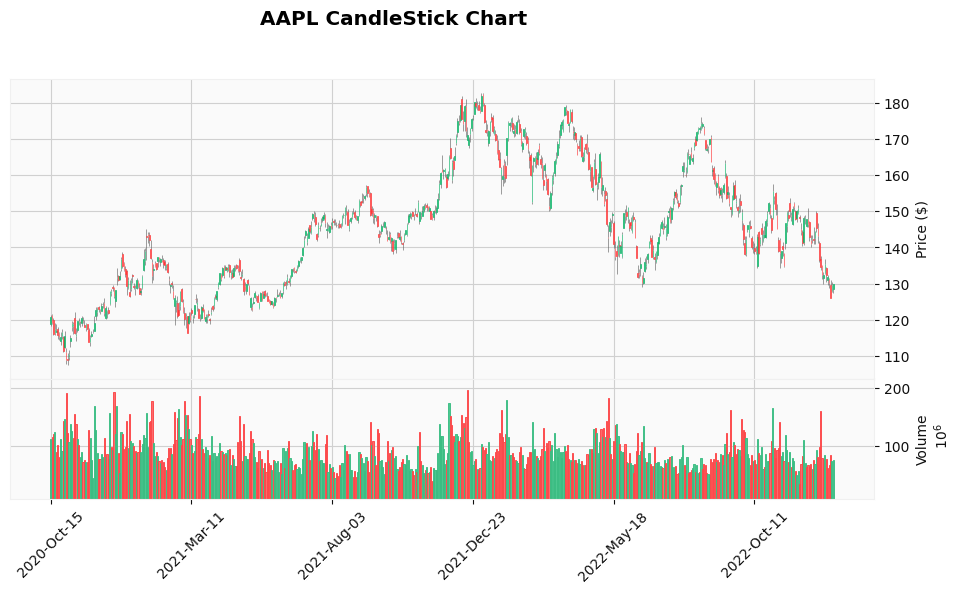

In [ ]:
import mplfinance as mpf
stock_data.index=pd.to_datetime(stock_data.index)
mpf.plot(stock_data,type='candle',volume=True,style='yahoo',title=f"{ticker} CandleStick Chart",ylabel='Price ($)',ylabel_lower='Volume',figsize=(12,6))

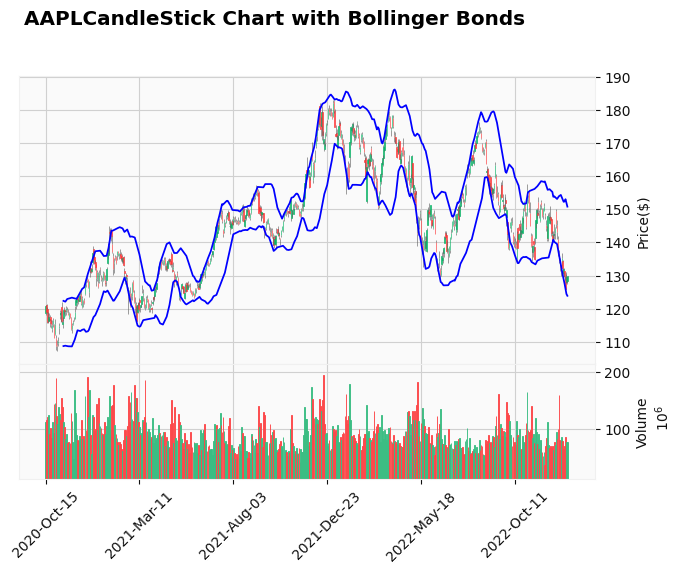

In [ ]:
#Calculate Bollinger Bands
stock_data['MA20']=stock_data['Close'].rolling(window=20).mean()
stock_data['BB_up']=stock_data['MA20']+2*stock_data['Close'].rolling(window=20).std()
stock_data['BB_down']=stock_data['MA20']-2*stock_data['Close'].rolling(window=20).std()

#Plot with Bollinger Bands
add_plots=[mpf.make_addplot(stock_data['BB_up'],color='blue'),
           mpf.make_addplot(stock_data['BB_down'],color='blue')]

mpf.plot(stock_data,type='candle',volume=True,style='yahoo',title=f"{ticker}CandleStick Chart with Bollinger Bonds",ylabel='Price($)',ylabel_lower='Volume',addplot=add_plots)

[*********************100%%**********************]  3 of 3 completed


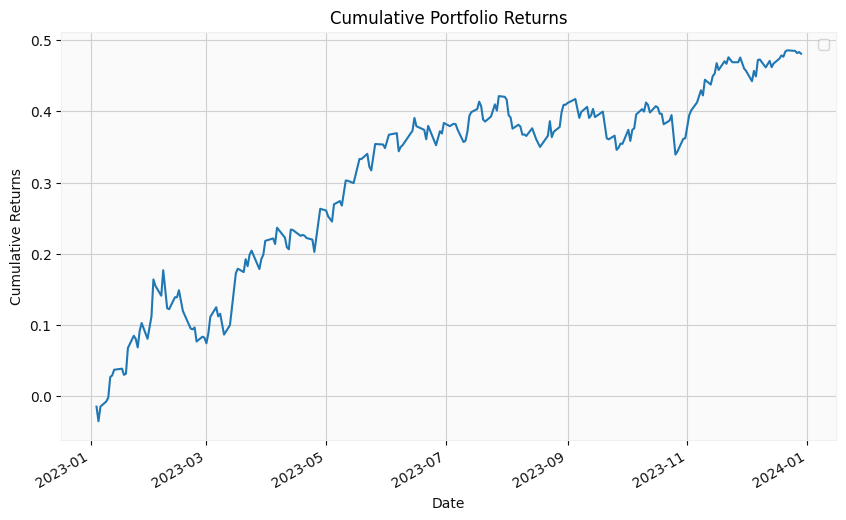

In [ ]:
import numpy as np
tickers = ['AAPL', 'MSFT', 'GOOGL']
data=yf.download(tickers,start='2023-01-01',end='2024-01-01')['Adj Close']

#Calculate Daily Returns
Daily_Return=data.pct_change().dropna()

#Portfolio returns with equal weights
weights=np.array([1/len(tickers)]*len(tickers))
portfolio_returns=Daily_Return.dot(weights)
#Plot Portfolio performance
portfolio_returns.cumsum().plot(figsize=(10,6),title="Cumulative Portfolio Returns")
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.legend()
plt.show()